## Part - A : Keyword Selection and Data Collection; 20 points

1. Pick one keyword (or multiple keywords if you want) of your interests.
2. [tweet data] Using the Python script the instructor team provided, collect 10K recent tweets on the selected keyword.
3. From the collected tweets, get the list of unique author IDs.
4. [author data] Using the provided Python script, collect the author information of those author IDs.


In [365]:
import pandas as pd
import tweepy
import plotly.express as px

# import nltk package
import nltk

import time

import re

import string

from collections import Counter

from TwitterCollector import TwitterCollector

# you will use this later to specify the collection time window
from datetime import date

In [366]:
api = tweepy.API(wait_on_rate_limit=True)

In [367]:
# please fill in your bearer token here
bearer_token = r"AAAAAAAAAAAAAAAAAAAAAMYfhQEAAAAAdteXiWQGsne%2FiaKzkz9Z6o84%2F5U%3D5dCuKmB8hIoLkV8h3EdGMiE0yt0K1VLPxV5s6viqQ8taHzkp5y"

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

##### 1. Pick one keyword (or multiple keywords if you want) of your interests.

In [368]:
query = 'Iran -is:retweet lang:en'  # tweets containing the word 'Iran' and excluding retweets
query

'Iran -is:retweet lang:en'

##### 2. [tweet data] Using the Python script the instructor team provided, collect 10K recent tweets on the selected keyword.

In [369]:
recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
                                            , tweets_cnt = 10000  # specify the number of tweets you want to collect
                                            , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                            )

In [370]:
tweet_id_list = []
text_list = []
author_id_list = []
source_list = []
public_metrics_list = []
created_at_list = []
lang_list = []

for tweet in recent_tweets['tweets'] : 

    tweet_id_list.append(tweet['id'])
    text_list.append(tweet['text'])
    author_id_list.append(tweet['author_id'])
    source_list.append(tweet['source'])
    public_metrics_list.append(tweet['public_metrics'])
    created_at_list.append(tweet['created_at'])
    lang_list.append(tweet['lang'])
    
tweets_df = pd.DataFrame()

tweets_df['id'] = tweet_id_list
tweets_df['text'] = text_list
tweets_df['author_id'] = author_id_list
tweets_df['source'] = source_list
tweets_df['public_metrics'] = public_metrics_list
tweets_df['created_at'] = created_at_list
tweets_df['lang'] = lang_list


In [371]:
tweets_df.head()

,id,text,author_id,source,public_metrics,created_at,lang
0,1578288045757173760,@JustinTrudeau how dare are you? This #DirtyTerroristMullahsRegime in Iran and its Terrorist mercenaries organized in #IRGC are killing our innocent girls every day and night but you sit and watch ?!!!! https://t.co/VN7qSe2WtY,991935207950503937,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",2022-10-07T07:36:07.000Z,en
1,1578288038286790656,@SamRasoulpour @repubblica For Iran\n#MahsaAmini\n#مهسا_امینی\n#اعتصابات_سراسری,1577562727706394624,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",2022-10-07T07:36:06.000Z,en
2,1578288026018807811,Expulsion of a student supporting the Islamic Republic of Iran which study in UNIPD - Firma la petizione! https://t.co/MAeyPcvtTz via @ChangeItalia,1283389968975638528,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",2022-10-07T07:36:03.000Z,en
3,1578288012336988160,"@democracynow @ntabrizy Shame on you\nHow dare to talk about what's happening in iran NOW if you got videos from first week/days\nShameful that you don't know even the Names correctly\nShame on you that even you don't know ""zan, zendegi, azadi"" is not originated in kurdish, this is PERSIAN words\nLearn it",1228586524675100672,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",2022-10-07T07:35:59.000Z,en
4,1578288008985382912,@ZibaHarding @guardian Miserably you are a clodhopper who is setiously under influence of the hostile media which goes to great length to cajole credulous people like you into believing that the sitting system in Iran is the enemy of nation! Steering clear of them may help you wake up to the truth.,1565731714563031041,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",2022-10-07T07:35:59.000Z,en


In [372]:
tweets_df.shape

(10000, 7)

In [373]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

##### 3. From the collected tweets, get the list of unique author IDs.

In [374]:
print('No. of unique author IDs :', tweets_df['author_id'].nunique())

No. of unique author IDs : 5361


##### 4. [author data] Using the provided Python script, collect the author information of those author IDs.

In [375]:
# Code taken from : https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [376]:
unique_author_id_list = list(tweets_df['author_id'].unique())
len(unique_author_id_list)

5361

In [377]:
list_1, list_2, list_3, list_4, list_5, list_6, list_7, list_8 = list(split(unique_author_id_list, 8))

In [378]:
print('List 1 :', len(list_1))
print('List 2 :', len(list_2))
print('List 3 :', len(list_3))
print('List 4 :', len(list_4))
print('List 5 :', len(list_5))
print('List 6 :', len(list_6))
print('List 7 :', len(list_7))
print('List 8 :', len(list_8))

List 1 : 671
List 2 : 670
List 3 : 670
List 4 : 670
List 5 : 670
List 6 : 670
List 7 : 670
List 8 : 670


In [379]:
def get_author_info(author_id_list) : 
    
    author_info_list = []
    author_info_id_list = []
    could_not_fetch_info_author_ids = []

    for author_id in list(set(author_id_list)) : 

        try : 
            author_info = tc.fetch_author_info(author_id)
            author_info_list.append(author_info)
            author_info_id_list.append(author_id)

        except : 
            could_not_fetch_info_author_ids.append(author_id)
            time.sleep(10*60) # Rest for 15 mins and wait for the timeframe to reset
            
    author_df = pd.DataFrame()
    author_df['author_id'] = author_info_id_list
    author_df['author_info'] = author_info_list
    
    return author_df, could_not_fetch_info_author_ids

In [380]:
author_df_1, could_not_fetch_info_author_ids_1 = get_author_info(list_1)

In [381]:
author_df_2, could_not_fetch_info_author_ids_2 = get_author_info(list_2)

In [382]:
author_df_3, could_not_fetch_info_author_ids_3 = get_author_info(list_3)

In [383]:
author_df_4, could_not_fetch_info_author_ids_4 = get_author_info(list_4)

In [384]:
author_df_5, could_not_fetch_info_author_ids_5 = get_author_info(list_5)

In [385]:
author_df_6, could_not_fetch_info_author_ids_6 = get_author_info(list_6)

In [386]:
author_df_7, could_not_fetch_info_author_ids_7 = get_author_info(list_7)

In [387]:
author_df_8, could_not_fetch_info_author_ids_8 = get_author_info(list_8)

In [572]:
dfs_list = [author_df_1, author_df_2, author_df_3, author_df_4, author_df_5, author_df_6, author_df_7, author_df_8]

author_info_df = pd.concat(dfs_list, axis = 0)

In [581]:
author_info_df

,author_id,author_info
0,2329927062,"{'verified': False, 'public_metrics': {'followers_count': 55, 'following_count': 219, 'tweet_count': 2433, 'listed_count': 0}, 'id': '2329927062', 'name': 'William Davis', 'description': '', 'created_at': '2014-02-06T08:11:40.000Z', 'username': 'Billd710Davis'}"
1,1283389968975638528,"{'id': '1283389968975638528', 'created_at': '2020-07-15T13:20:04.000Z', 'public_metrics': {'followers_count': 625, 'following_count': 1609, 'tweet_count': 19945, 'listed_count': 0}, 'verified': False, 'description': '', 'name': 'Adrian', 'username': 'Adrian75189654'}"
2,295693924,"{'username': 'fpjindia', 'verified': True, 'location': 'India', 'name': 'Free Press Journal', 'public_metrics': {'followers_count': 34572, 'following_count': 608, 'tweet_count': 338141, 'listed_count': 478}, 'description': 'The voice of #Mumbai with heritage of more than 94 years. Get updates on latest news, and more 💁‍♀️', 'created_at': '2011-05-09T14:15:05.000Z', 'id': '295693924'}"
3,1303790925945229316,"{'verified': False, 'id': '1303790925945229316', 'username': 'khadija_news', 'created_at': '2020-09-09T20:22:42.000Z', 'name': 'KhadijaNews', 'description': 'Get the latest news here. This page will keep you up-to-date with all the major headlines affecting latest news worldwide.', 'public_metrics': {'followers_count': 18, 'following_count': 107, 'tweet_count': 34836, 'listed_count': 1}}"
4,1575224058559463443,"{'public_metrics': {'followers_count': 303, 'following_count': 336, 'tweet_count': 1712, 'listed_count': 0}, 'verified': False, 'name': 'Tanin⁷ ☕️🍍(بک میدم)', 'created_at': '2022-09-28T20:41:05.000Z', 'description': 'My V is for Vendetta (اکانت قبلیم ساس شد فالو کن بزرگوار)', 'username': 'thisistanin', 'id': '1575224058559463443'}"
...,...,...
660,572748266,"{'username': 'kaleemsheikh2', 'name': 'kaleem sheikh', 'description': 'https://t.co/Z3RovUsR2l. LEARNT MUSIC FROM USTAD SULTAN KHAN. X MUSIC JOURNALIST FOR BBC X POLICE OFFICER. GAVE GUARDIAN LECTURE ON INDIAN CINEMA . Instagram kaleem_sheikh123', 'created_at': '2012-05-06T15:49:26.000Z', 'verified': False, 'id': '572748266', 'location': 'LONDON', 'public_metrics': {'followers_count': 234, 'following_count': 1221, 'tweet_count': 17630, 'listed_count': 5}}"
661,2768501,"{'location': 'Australia', 'created_at': '2007-03-29T02:15:36.000Z', 'name': 'ABC News', 'id': '2768501', 'public_metrics': {'followers_count': 2120086, 'following_count': 1176, 'tweet_count': 365145, 'listed_count': 13418}, 'username': 'abcnews', 'verified': True, 'description': 'Latest news updates (mostly automated) from the Australian Broadcasting Corp. This is an official @abcaustralia account.'}"
662,2901063413,"{'description': 'Bronx born/Brooklyn raised, investor, activist & host of 🎧 'Politics Today' Wednesday Mornings at 9:00 AM on https://t.co/gHZtRf1bKS or download the NSN app 🔊', 'verified': False, 'username': 'LeonGoldenberg1', 'id': '2901063413', 'public_metrics': {'followers_count': 1476, 'following_count': 101, 'tweet_count': 13777, 'listed_count': 12}, 'created_at': '2014-12-01T19:11:44.000Z', 'name': 'Leon Goldenberg'}"
663,1111614512900292608,"{'id': '1111614512900292608', 'description': 'जिंदगी जीने की कोशिश जारी है', 'location': 'भारत', 'verified': False, 'created_at': '2019-03-29T13:02:07.000Z', 'public_metrics': {'followers_count': 212, 'following_count': 245, 'tweet_count': 10748, 'listed_count': 1}, 'name': 'आशुतोष', 'username': 'Oldmonk70'}"


In [390]:
tweets_df = tweets_df.merge(author_info_df, on = 'author_id', how = 'left')

In [391]:
tweets_df.shape

(10000, 8)

In [392]:
tweets_df.to_csv('tweets_df.csv')

In [393]:
tweets_df[tweets_df['author_info'].isna()].shape

(37, 8)

## Part - B : Preliminary Analysis; 20 points

1. What are the ten most popular words with and without stop words?
2. What are the ten most popular hashtags (#hashtag)?
3. What are the ten most frequently mentioned usernames (@username)?
4. Which are the three most common sources of the tweets? A tweet’s source can be found in the “source” field in the tweet data.
5. Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) depending on the collected data).
6. Which are the three most influential tweets? A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”. These counts can be found in the “public_metrics” in the tweet data.
7. Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data? 
8. Who are the three most influential authors? A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.

##### 1. What are the ten most popular words with and without stop words?

In [394]:
texts_concat = ' '.join(text_list).split()
texts_concat = [i.lower() for i in texts_concat]

In [395]:
texts_concat

['@justintrudeau',
 'how',
 'dare',
 'are',
 'you?',
 'this',
 '#dirtyterroristmullahsregime',
 'in',
 'iran',
 'and',
 'its',
 'terrorist',
 'mercenaries',
 'organized',
 'in',
 '#irgc',
 'are',
 'killing',
 'our',
 'innocent',
 'girls',
 'every',
 'day',
 'and',
 'night',
 'but',
 'you',
 'sit',
 'and',
 'watch',
 '?!!!!',
 'https://t.co/vn7qse2wty',
 '@samrasoulpour',
 '@repubblica',
 'for',
 'iran',
 '#mahsaamini',
 '#مهسا_امینی',
 '#اعتصابات_سراسری',
 'expulsion',
 'of',
 'a',
 'student',
 'supporting',
 'the',
 'islamic',
 'republic',
 'of',
 'iran',
 'which',
 'study',
 'in',
 'unipd',
 '-',
 'firma',
 'la',
 'petizione!',
 'https://t.co/maeypcvttz',
 'via',
 '@changeitalia',
 '@democracynow',
 '@ntabrizy',
 'shame',
 'on',
 'you',
 'how',
 'dare',
 'to',
 'talk',
 'about',
 "what's",
 'happening',
 'in',
 'iran',
 'now',
 'if',
 'you',
 'got',
 'videos',
 'from',
 'first',
 'week/days',
 'shameful',
 'that',
 'you',
 "don't",
 'know',
 'even',
 'the',
 'names',
 'correctly',
 '

In [396]:
from collections import Counter

In [397]:
common_words_w_stopwords = Counter(texts_concat)
common_words_w_stopwords.most_common(10)

[('the', 11537),
 ('of', 6708),
 ('in', 6204),
 ('iran', 6195),
 ('and', 5651),
 ('to', 5446),
 ('for', 3807),
 ('a', 3286),
 ('is', 3273),
 ('#mahsaamini', 2589)]

In [398]:
import pickle
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

In [399]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [400]:
words2 = [] # our accumulator list

for w in texts_concat:
    if w not in stopwords and len(w) > 1:
        words2.append(w)

print(len(texts_concat))
print(len(words2))

279568
177651


In [401]:
texts_concat_wo_stopwords = [i for i in texts_concat if i not in stopwords and len(i) > 1]
len(texts_concat_wo_stopwords)

177651

In [402]:
common_words_wo_stopwords = Counter(texts_concat_wo_stopwords)
common_words_wo_stopwords.most_common(10)

[('iran', 6195),
 ('#mahsaamini', 2589),
 ('#مهسا_امینی', 2373),
 ('people', 1584),
 ('islamic', 1430),
 ('iranian', 1398),
 ('iran.', 1118),
 ('#opiran', 1111),
 ('regime', 1000),
 ('#iran', 960)]

##### 2. What are the ten most popular hashtags (#hashtag)?

In [403]:
hashtag_words = [i for i in texts_concat if i[0] == '#']

hashtag_words_counter = Counter(hashtag_words)
hashtag_words_counter.most_common(10)

[('#mahsaamini', 2589),
 ('#مهسا_امینی', 2373),
 ('#opiran', 1111),
 ('#iran', 960),
 ('#نیکا_شاکرمی', 885),
 ('#nikashakarami', 705),
 ('#اعتصابات_سراسری', 467),
 ('#mahsa_amini', 382),
 ('#iranrevolution2022', 270),
 ('#iranprotests', 249)]

##### 3. What are the ten most frequently mentioned usernames (@username)?

In [404]:
username_words = [i for i in texts_concat if i[0] == '@']

username_words_counter = Counter(username_words)
username_words_counter.most_common(10)

[('@washingtonpost', 355),
 ('@nytimes', 325),
 ('@cnn', 321),
 ('@nbcnews', 219),
 ('@un', 208),
 ('@guardian', 204),
 ('@potus', 192),
 ('@amnesty', 191),
 ('@time', 178),
 ('@europarl_en', 174)]

##### 4. Which are the three most common sources of the tweets? A tweet’s source can be found in the “source” field in the tweet data.

In [405]:
tweets_df['id'].nunique()

10000

In [406]:
tweets_df.groupby('source')[['id']].nunique().\
        reset_index().rename(columns = {'id' : 'no_of_tweets'}).\
                sort_values(by = 'no_of_tweets', ascending = False).head(3)

,source,no_of_tweets
85,Twitter for Android,3803
88,Twitter for iPhone,3147
83,Twitter Web App,2206


##### 5. Create a line chart to show the time trend of tweet counts (number of tweets in a day (or an hour or a minute) depending on the collected data).


In [407]:
tweets_df['created_at'].min()

Timestamp('2022-10-07 00:22:55+0000', tz='UTC')

In [408]:
tweets_df['created_at'].max()

Timestamp('2022-10-07 07:36:07+0000', tz='UTC')

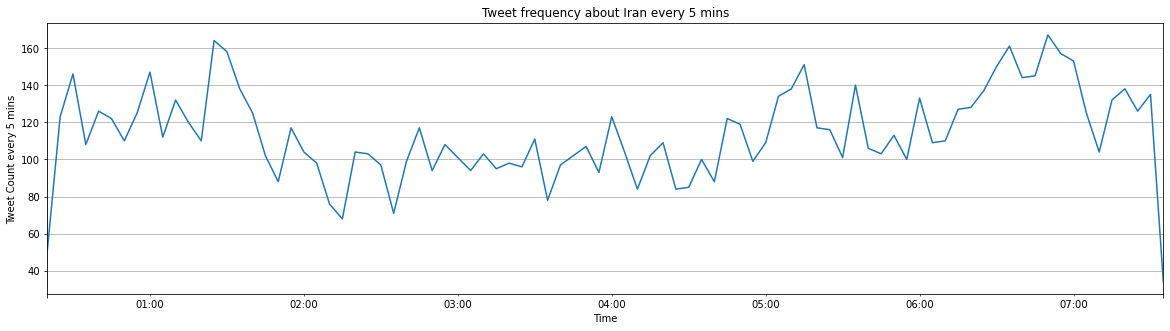

In [550]:
tweet_5_df = tweets_df.groupby(pd.Grouper(key='created_at', freq='5Min', convention='start')).size()
tweet_5_df.plot(figsize=(20,5))
plt.xlabel('Time')
plt.ylabel('Tweet Count every 5 mins')
plt.title('Tweet frequency about Iran every 5 mins')
plt.grid(True)

##### 6. Which are the three most influential tweets? A tweet’s influence score is the sum of “quote_count”, “reply_count”, “retweet_count”, “like_count”. These counts can be found in the “public_metrics” in the tweet data.

In [410]:
tweets_df['public_metrics'][0]

{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}

In [411]:
tweets_df['influence_score'] = tweets_df['public_metrics'].apply(lambda x : x['retweet_count'] + x['reply_count'] +\
                                     x['like_count'] + x['quote_count'])

In [554]:
three_most_inf_tweets_df = tweets_df.sort_values(by = 'influence_score', ascending=False).\
        head(3)
pd.options.display.max_colwidth = 1000
three_most_inf_tweets_df

,id,text,author_id,source,public_metrics,created_at,lang,author_info,influence_score,text_updated,sentiment_score,polarity,subjectivity,create
2956,1578259705650028544,"OPEC Decision to cut oil production calls for USA rethinking its “Sanction every Country” policy time to rethink policy Viz. Iran and Venezuela, Russian-Ukraine war must end so world can take breath, world politics is killing poor people in every country",113286385,Twitter for iPhone,"{'retweet_count': 742, 'reply_count': 39, 'like_count': 2912, 'quote_count': 4}",2022-10-07 05:43:31+00:00,en,"{'location': 'PAKISTAN', 'public_metrics': {'followers_count': 5823577, 'following_count': 2807, 'tweet_count': 42994, 'listed_count': 1913}, 'id': '113286385', 'username': 'fawadchaudhry', 'verified': True, 'name': 'Ch Fawad Hussain', 'created_at': '2010-02-11T08:25:19.000Z', 'description': 'Pakistan Tehreek Insaf'}",3697,OPEC Decision cut oil production calls USA rethinking “Sanction every Country” policy time rethink policy Viz Iran Venezuela RussianUkraine war must end world take breath world politics killing poor people every country,"(-0.4, 0.6)",-0.400000,0.600000,05:43:31
6660,1578215783766827009,"They marched for Black Lives Matter after George Floyd was killed, they marched for Dalit Lives Matter but why aren't India's woke activists marching for Iran's anti-Hijab crusaders. In this article I reveal the reason.\n\nHere's the link https://t.co/4t2pxsvnfR https://t.co/CwQQqiJ41D",635895185,Twitter for Android,"{'retweet_count': 770, 'reply_count': 61, 'like_count': 2309, 'quote_count': 16}",2022-10-07 02:48:59+00:00,en,"{'public_metrics': {'followers_count': 206144, 'following_count': 621, 'tweet_count': 56725, 'listed_count': 364}, 'location': 'New Delhi', 'verified': True, 'name': 'Rahul Shivshankar', 'created_at': '2012-07-15T04:29:13.000Z', 'description': 'Editorial Director & Editor-in-Chief @TimesNow| Progressive Conservative| Columnist with ToI| Published Author. All views expressed here are personal.', 'username': 'RShivshankar', 'id': '635895185'}",3156,They marched Black Lives Matter George Floyd killed marched Dalit Lives Matter Indias woke activists marching Irans antiHijab crusaders In article reveal reason Heres link,"(-0.18333333333333335, 0.21666666666666667)",-0.183333,0.216667,02:48:59
4355,1578245283821277184,Grateful to have this platform to share what matters to me. \n\n#MahsaAmini\n#IranProtests \n\nhttps://t.co/NeEOz3EMic,40535534,Twitter for iPhone,"{'retweet_count': 406, 'reply_count': 69, 'like_count': 1279, 'quote_count': 15}",2022-10-07 04:46:12+00:00,en,"{'public_metrics': {'followers_count': 135574, 'following_count': 739, 'tweet_count': 10867, 'listed_count': 680}, 'created_at': '2009-05-16T20:27:45.000Z', 'description': 'Actor • Currently Bronwyn on @lotronprime • Human rights advocate • Ambassador @AmnestyUK • Honorary Board Member @HostageAid • Member @CFR_org', 'name': 'Nazanin Boniadi', 'id': '40535534', 'username': 'NazaninBoniadi', 'verified': True}",1769,Grateful platform share matters me MahsaAmini IranProtests,"(0.0, 0.0)",0.000000,0.000000,04:46:12


##### 7. Who are the three most vocal authors on the keyword? In other words, who are the most frequently tweeting authors in the tweet data?

In [413]:
three_most_vocal_authors_df = tweets_df.groupby('author_id')\
                                    ['text'].nunique().reset_index().\
                                            rename(columns = {'text' : 'no_of_tweets'}).\
                                                sort_values(by = 'no_of_tweets', ascending = False).\
                                                        head(3)

three_most_vocal_authors_df.merge(author_info_df, on = 'author_id',\
                                         how = 'left')

,author_id,no_of_tweets,author_info
0,1014005559001939969,155,"{'created_at': '2018-07-03T04:38:59.000Z', 'verified': False, 'id': '1014005559001939969', 'description': 'Author, Scholar, Wanderer', 'location': 'New York, USA', 'name': 'R. J. Rhod', 'username': 'RjRhod', 'public_metrics': {'followers_count': 0, 'following_count': 33, 'tweet_count': 1498, 'listed_count': 0}}"
1,542812153,119,"{'description': 'Nothing is too hard for God', 'name': 'Amin', 'verified': False, 'id': '542812153', 'location': 'Royaume-Uni', 'public_metrics': {'followers_count': 62, 'following_count': 492, 'tweet_count': 157, 'listed_count': 1}, 'created_at': '2012-04-01T20:00:38.000Z', 'username': 'mohammadamin761'}"
2,1575061983191351297,113,"{'description': '', 'public_metrics': {'followers_count': 1, 'following_count': 21, 'tweet_count': 750, 'listed_count': 0}, 'id': '1575061983191351297', 'created_at': '2022-09-28T09:57:06.000Z', 'verified': False, 'username': 'sara71417635', 'name': 'sara'}"


##### 8. Who are the three most influential authors? A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.

In [414]:
tweets_df['author_info'][0]

{'verified': False,
 'public_metrics': {'followers_count': 713,
  'following_count': 1545,
  'tweet_count': 54102,
  'listed_count': 0},
 'id': '991935207950503937',
 'name': 'Dejavu',
 'description': 'من هم مصطفی صالحی ها و نویدافکاری ها و ارسلان رضایی ها هستم.\n با مزدوران خودفروش و وطنفروش ادب هرگز "توهین به شرافت انسانیست چنین کسانیرابزبان انسانی خطاب کردن"',
 'created_at': '2018-05-03T06:59:17.000Z',
 'username': 'Dejavu6224231'}

In [415]:
author_inf_score_list = []
author_info_name_list = []
author_info_username_list = []
author_id_list = []

for index, row in tweets_df.iterrows() : 
    
    try : 
        followers_count = row['author_info']['public_metrics']['followers_count']
        following_count = row['author_info']['public_metrics']['following_count']
        tweet_count = row['author_info']['public_metrics']['tweet_count']
        listed_count = row['author_info']['public_metrics']['listed_count']
        
        author_inf_score = followers_count + following_count + tweet_count + listed_count
        
        author_inf_score_list.append(author_inf_score)
        author_id_list.append(row['author_id'])
        author_info_name_list.append(row['author_info']['name'])
        author_info_username_list.append(row['author_info']['username'])
        
    except : 
        pass

In [582]:
author_inf_df = pd.DataFrame()

author_inf_df['author_id'] = author_id_list
author_inf_df['author_inf_score'] = author_inf_score_list
author_inf_df['author_name'] = author_info_name_list
author_inf_df['author_user_name'] = author_info_username_list
author_inf_df = author_inf_df.drop_duplicates(subset=['author_id'])

In [584]:
three_most_inf_authors = author_inf_df.sort_values(by = 'author_inf_score', ascending=False).head(3)
three_most_inf_authors

,author_id,author_inf_score,author_name,author_user_name
420,1652541,26616970,Reuters,Reuters
6826,3108351,20742070,The Wall Street Journal,WSJ
6141,2467791,20463599,The Washington Post,washingtonpost


In [418]:
tweets_df[tweets_df['author_id'].isin(three_most_inf_authors['author_id'].unique())]

,id,text,author_id,source,public_metrics,created_at,lang,author_info,influence_score
421,1578284067501625345,"From refuge in Iraq, Kurdish exiles hope Iran's 'revolution' prevails https://t.co/AJlem9F5fN https://t.co/UkjEBCPcbx",1652541,True Anthem,"{'retweet_count': 5, 'reply_count': 1, 'like_count': 43, 'quote_count': 1}",2022-10-07 07:20:19+00:00,en,"{'id': '1652541', 'description': 'Top and breaking news, pictures and videos from Reuters. For more breaking business news, follow @ReutersBiz.', 'username': 'Reuters', 'verified': True, 'public_metrics': {'followers_count': 25560714, 'following_count': 1239, 'tweet_count': 918957, 'listed_count': 136060}, 'name': 'Reuters', 'created_at': '2007-03-20T17:46:05.000Z', 'location': 'Around the world'}",50
2469,1578265231989538817,"Analysis: Braced to crush unrest, Iran's rulers heed lessons of Shah's fall - analysts https://t.co/BcHe1ScWKv https://t.co/4Md3aJX1bf",1652541,True Anthem,"{'retweet_count': 13, 'reply_count': 18, 'like_count': 57, 'quote_count': 7}",2022-10-07 06:05:28+00:00,en,"{'id': '1652541', 'description': 'Top and breaking news, pictures and videos from Reuters. For more breaking business news, follow @ReutersBiz.', 'username': 'Reuters', 'verified': True, 'public_metrics': {'followers_count': 25560714, 'following_count': 1239, 'tweet_count': 918957, 'listed_count': 136060}, 'name': 'Reuters', 'created_at': '2007-03-20T17:46:05.000Z', 'location': 'Around the world'}",95
6852,1578213542498631681,"Women around the world are shearing their locks in response to Mahsa Amini’s death, posting the resulting videos on social media https://t.co/35roafKumy",3108351,SocialFlow,"{'retweet_count': 34, 'reply_count': 13, 'like_count': 98, 'quote_count': 2}",2022-10-07 02:40:04+00:00,en,"{'location': 'New York, NY', 'id': '3108351', 'username': 'WSJ', 'name': 'The Wall Street Journal', 'description': 'Sign up for our newsletters and alerts: https://t.co/QevH0DLisA For WSJ customer support: https://t.co/DZgH9n4vAI', 'public_metrics': {'followers_count': 20228028, 'following_count': 1079, 'tweet_count': 385750, 'listed_count': 127213}, 'verified': True, 'created_at': '2007-04-01T06:22:13.000Z'}",147


## Part - C : Word Cloud; 20 points

Create a word cloud from the collected tweets. Please remove stop words before feeding the text into the wordcloud module. Feel free to add meaningless words (e.g, br, sr, etc.) into the stop words list for better interpretation. You don’t need to do stemming/lemmatization for this project.


In [523]:
import nltk
from nltk.corpus import stopwords

In [524]:
extra_stop_words = (stopwords.words('english'))
print(len(extra_stop_words))

extra_stop_words.extend(['rt', 'many,many,', ' iran', 'iran ', 'iran,', 'iran.',\
                        'https://t.co/h8fshl9v0e', 'iran--much', 'has…',\
                        'anonymously--has', 'for…', 't', 'co','https://t.co/h8fshlqy2e',\
                        'want', 'don’t', '“we', 'ha…', '2nd',\
                        '#مهسا_امینی', '#مهسا_امینی', 'tens', 'thousands', 'اعتصاباتسراسری',\
                        'نیکاشاکرمی','اعتراضاتسراسری','iran…', "iran's", '#iran,', '#iran.',\
                        'اعتصاباتسراسری', 'opiran', 's', ' s',\
                        '#اعتصابات_سراسری', 'amp', 'u', ' s '])
len(extra_stop_words)

179


217

In [525]:
no_stopwords = [i for i in texts_concat_wo_stopwords if i not in extra_stop_words]
#print(no_stopwords)

In [526]:
# no_stopwords_counter = Counter(no_stopwords)
# no_stopwords_counter.most_common(200)

In [527]:
no_stopwords_concat = ' '.join(no_stopwords)

In [528]:
no_stopwords_concat = no_stopwords_concat.translate(str.maketrans('', '', string.punctuation))

In [529]:
# Code taken from : https://stackoverflow.com/questions/24399820/expression-to-remove-url-links-from-twitter-tweet

no_stopwords_concat = re.sub(r"http\S+", "", no_stopwords_concat)
no_stopwords_concat = re.sub(r"https\S+", "", no_stopwords_concat)

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
no_stopwords_concat = re.sub(pattern, '', no_stopwords_concat)

In [530]:
# Code taken from : https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

import re

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"                           "]+", flags=re.UNICODE)

no_stopwords_concat = emoji_pattern.sub(r'', no_stopwords_concat) # no emoji

In [535]:
# remove any extra stop words that may have been created as a result of punctuation removal
no_stopwords_concat_list = no_stopwords_concat.split()
no_stopwords_concat_list = [i for i in no_stopwords_concat_list if i not in extra_stop_words]
no_stopwords_concat = " ".join(no_stopwords_concat_list)

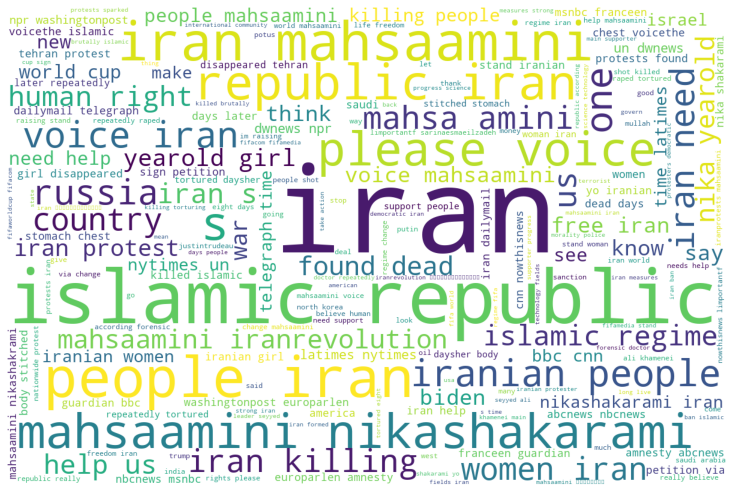

In [534]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10).generate(no_stopwords_concat)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Part - D : Sentiment Analysis; 20 points

Using TextBlob, calculate the polarity and subjectivity scores for the collected tweets, and answer the following questions.

1. What are the average polarity and subjectivity scores?
2. Visualize the polarity and subjectivity score distributions using histograms, where X-axis is the score and Y-axis is the tweet count in the score bin. In total, there should be 2 histograms for this task.
3. Based on the polarity scores, what are the most positive and negative tweets on the keyword? Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.



In [429]:
from textblob import TextBlob
import emoji

##### 1. What are the average polarity and subjectivity scores?

In [430]:
def text_processing(text) : 
    
    text_list = text.split()
#     print(text_list)
    
    # Remove all stop words,
    text_list_wo_stopwords = [i for i in text_list if i not in stopwords and len(i) > 1]
    text_list_wo_stopwords = [i for i in text_list_wo_stopwords if i not in extra_stop_words]
    
    # Concat the words back into a single string after removing stop words,
    text_list_wo_stopwords_concat = ' '.join(text_list_wo_stopwords)
    
    # Remove any punctuations,
    text_list_wo_stopwords_concat = text_list_wo_stopwords_concat.translate(str.maketrans('', '', string.punctuation))
    
    # Remove any URL links from the tweet,
    text_list_wo_stopwords_concat = re.sub(r"http\S+", "", text_list_wo_stopwords_concat)
    text_list_wo_stopwords_concat = re.sub(r"https\S+", "", text_list_wo_stopwords_concat)
    
    # Remove any numbers present,
    pattern = r'[0-9]'
    text_list_wo_stopwords_concat = re.sub(pattern, '', text_list_wo_stopwords_concat)
    
    # Convert emoji to text,
    text_list_wo_stopwords_concat = emoji.demojize(text_list_wo_stopwords_concat)
    
    # Remove any punctuations again after converting emoji to text,
    text_list_wo_stopwords_concat = text_list_wo_stopwords_concat.translate(str.maketrans('', '', string.punctuation))
    
    return text_list_wo_stopwords_concat
    

In [431]:
tweets_df.shape

(10000, 9)

In [432]:
import pickle
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

In [433]:
tweets_df['text_updated'] = tweets_df['text'].apply(lambda x : text_processing(x))

In [434]:
def apply_textblob(text) : 
    
    tb = TextBlob(text)
    
    return tb.sentiment

In [435]:
tweets_df['sentiment_score'] = tweets_df['text_updated'].apply(lambda x : apply_textblob(x))

In [436]:
tweets_df['polarity'] = tweets_df['sentiment_score'].apply(lambda x : x[0])
tweets_df['subjectivity'] = tweets_df['sentiment_score'].apply(lambda x : x[1])

In [437]:
print('Avg. polarity score :', tweets_df['polarity'].mean())
print('Avg. subjectivity score :', tweets_df['subjectivity'].mean())

Avg. polarity score : 0.01637481340116171
Avg. subjectivity score : 0.28787903933778186


##### 2. Visualize the polarity and subjectivity score distributions using histograms, where X-axis is the score and Y-axis is the tweet count in the score bin. In total, there should be 2 histograms for this task.

In [438]:
pol_list = list(tweets_df['polarity'].unique())
sub_list = list(tweets_df['subjectivity'].unique())

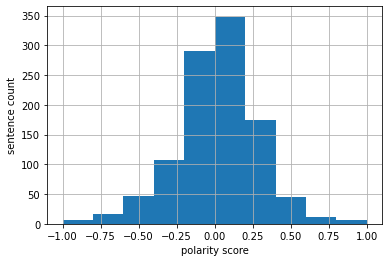

In [439]:
plt.hist(pol_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()

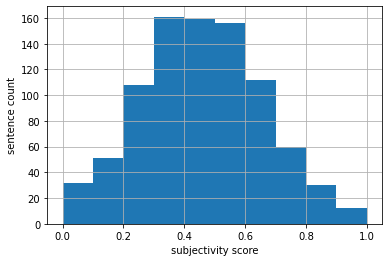

In [440]:
plt.hist(sub_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

##### 3. Based on the polarity scores, what are the most positive and negative tweets on the keyword? Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.

In [441]:
tweets_df_pol_sorted = tweets_df.sort_values(by = 'polarity', ascending=False)

In [442]:
top_3 = tweets_df_pol_sorted.head(3)

for index, row in top_3.iterrows() : 
    
    print(row['text'], '-------------', 'Polarity :', row['polarity'], ',', 'Subjectivity :', row['subjectivity'])

    print('-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x')
    print('\n')

Three best friends drive 1,700 miles through India in a rickshaw after 11,800-mile journey from Scotland to Iran https://t.co/Qh6wLmEVj5 ------------- Polarity : 1.0 , Subjectivity : 0.3
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x


This 👇 is an excellent thread about the reality about what’s happening in Iran.

Iranians don’t want reform, they want regime change. https://t.co/z9GV0cnabx ------------- Polarity : 1.0 , Subjectivity : 1.0
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x


@PahlaviReza https://t.co/TpAeIhsIck
@elonmusk @rustyrockets 
Both follow our prince in exile @PahlaviReza #PAHLAVl4iran  that is perfect path to rescue Iran from occupation of mullahs 43 years ------------- Polarity : 1.0 , Subjectivity : 1.0
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x




In [443]:
bottom_3 = tweets_df_pol_sorted.tail(3)

for index, row in bottom_3.iterrows() : 
    
    print(row['text'], '-------------', 'Polarity :', row['polarity'], ',', 'Subjectivity :', row['subjectivity'])

    print('-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x')
    print('\n')

@PersonWhoCares7 I guess all you hysterical #MAGA terrorists are forgetting all the times your lord and saviour Trump threatened to nuke  Iran, and North Korea, while you cheered. ------------- Polarity : -1.0 , Subjectivity : 1.0
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x


i used to think there is nothing worst than #Nicklback
but today We All Know About The Islamic Regim of iran:)
#MahsaAmini 
#Opiran ------------- Polarity : -1.0 , Subjectivity : 1.0
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x


@RealPersianGod @PanteaPeyvandi #Biden u r disgusting as Obama, we never forget ur support to Islamic dictatorship in Iran. Never forget
#Mahsa_Amini ------------- Polarity : -1.0 , Subjectivity : 1.0
-x-x-x-x-x-x--x-x-x-x-x-x-x--x-x-x-x-x--x-x-x-x--x-x




In [444]:
tweets_df[tweets_df['polarity'] <= -0.75]['text'].unique()

array(['United States President Joe Biden issued a statement to condemn the violent crackdown on protesters in Iran. The statement read: “I remain gravely concerned about reports https://t.co/2VODxn9dQK \n#قيام_تا_سرنگونى\n#ایران_قیام_آزادی',
       "Iran protests: What happened on Zahedan's 'Bloody Friday'? https://t.co/m2xwu7lqdh",
       '@Kingmoir_ A 22-year-old girl was brutally murdered by the security police. The people of Iran need you\n#مهسا_امینی',
       'https://t.co/mH6CSrT5is\nPathetic',
       'Pictured below is the flag of Iran. \n\n🇮🇷 this is the flag of our oppressor. \n\n@AppleSupport please can we get an emoji update in solidarity with the women and children risking their lives against this brutal regime. #MahsaAmini https://t.co/MwWigJEE7f',
       '@Man_Haminam A 22-year-old girl was brutally murdered by the security police. The people of Iran need you\n#مهسا_امینی',
       "@emilykschrader Iran knows your cruel intentions if they don't do it you people gonna brin